In [15]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from math import log
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
from PIL import Image

# Download the punkt and stopwords from nltk
nltk.download('stopwords')
nltk.download('punkt')

# Get the stop words and punkt from nltk
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emdoehring/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/emdoehring/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
# load in file
df = pd.read_csv('Lorde Lyrics.csv', index_col=0)
df.head()

,Artist,Album,Release Date,Lyrics
Royals,Lorde,Pure Heroine,"{'year': 2013, 'month': 6, 'day': 3}",I've never seen a diamond in the flesh\nI cut ...
Team,Lorde,Pure Heroine,"{'year': 2013, 'month': 9, 'day': 13}",Wait till you're announced\nWe've not yet lost...
Liability,Lorde,Melodrama (Japanese Edition),"{'year': 2017, 'month': 3, 'day': 9}","Go for it\nOne, two\n\nBaby really hurt me, cr..."
Green Light,Lorde,Melodrama (Japanese Edition),"{'year': 2017, 'month': 3, 'day': 2}",I do my makeup in somebody else's car\nWe orde...
Ribs,Lorde,Pure Heroine,"{'year': 2013, 'month': 9, 'day': 27}","The drink you spilt all over me\nLover's Spit""..."


In [17]:
import os 
import pandas as pd
import numpy as np

# regular expression import
import re

# uni-code library
import unicodedata

# natural language toolkit library/modules
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

def basic_clean(string):
    '''
    This function takes in a string and
    returns the string normalized.
    '''
    string = unicodedata.normalize('NFKD', string)\
             .encode('ascii', 'ignore')\
             .decode('utf-8', 'ignore')
    string = re.sub(r'[^\w\s]', '', string).lower()
    return string

def stem(string):
    '''
    This function takes in a string and
    returns a string with words stemmed.
    '''
    # Create porter stemmer.
    ps = nltk.porter.PorterStemmer()
    
    # Use the stemmer to stem each word in the list of words we created by using split.
    stems = [ps.stem(word) for word in string.split()]
    
    # Join our lists of words into a string again and assign to a variable.
    string = ' '.join(stems)
    
    return string

def lemmatize(string):
    '''
    This function takes in string for and
    returns a string with words lemmatized.
    '''
    # Create the lemmatizer.
    wnl = nltk.stem.WordNetLemmatizer()

    # Use the lemmatizer on each word in the list of words we created by using split.
    lemmas = [wnl.lemmatize(word) for word in string.split()]

    # Join our list of words into a string again and assign to a variable.
    string = ' '.join(lemmas)
    
    return string

def remove_stopwords(string, extra_words = [], exclude_words = []):
    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    # Create stopword_list.
    stopword_list = stopwords.words('english')
    
    # Remove 'exclude_words' from stopword_list to keep these in my text.
    stopword_list = set(stopword_list) - set(exclude_words)
    
    # Add in 'extra_words' to stopword_list.
    stopword_list = stopword_list.union(set(extra_words))

    # Tokenize string.
    words = word_tokenize(string)
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings and assign to a variable.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords

def clean(text):
    '''
    This function combines the above steps and added extra stop words to clean text
    '''
    return remove_stopwords(lemmatize(basic_clean(text)), extra_words = ['dont', 'cant', 'im', 'ive', 'ill', 'te', 'youre', 'wan', 'na', 'wa'])

texts = df['Lyrics']
    
cleaned_texts = [clean(text) for text in texts]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_texts)

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert TF-IDF matrix to a dictionary
word_tfidf = dict(zip(feature_names, tfidf_matrix.mean(axis=0).tolist()[0]))

print(word_tfidf)

{'abhorrent': 0.0005914089249183741, 'abnormally': 0.0006276308960988448, 'acid': 0.0011035022350593274, 'acting': 0.003213717907629782, 'address': 0.003114125541736994, 'admired': 0.0026229961926855752, 'admirer': 0.0009019504619199692, 'admit': 0.0012595748842560656, 'adventure': 0.0007603590829200772, 'affair': 0.005599734358484416, 'afraid': 0.006219355640633199, 'afternoon': 0.002110325694496353, 'age': 0.00457173530123038, 'ago': 0.0011722989168729092, 'ah': 0.005676689184662251, 'aha': 0.003226706881181826, 'ahah': 0.004773279097766181, 'ahahah': 0.002610825180734698, 'ahatia': 0.0011182628462408262, 'ahau': 0.0010534950169279167, 'ahead': 0.0012943638173895182, 'ahha': 0.001474828127990515, 'ahika': 0.0004891181089141398, 'ahungarua': 0.0006781586792742538, 'ahurei': 0.0011118470992497159, 'ahureinga': 0.0004891181089141398, 'ai': 0.002860874288076318, 'aimed': 0.0011366207635232323, 'aint': 0.00806668700514618, 'air': 0.002331840022388336, 'airline': 0.0008367734518982687, 'ak

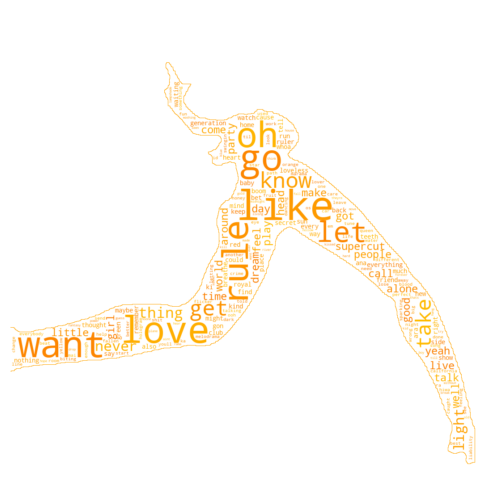

In [18]:
### colormap
# import the desired colormap from matplotlib
cmap = mpl.cm.Wistia(np.linspace(0,1,20)) 
# the darker part of the matrix is selected for readability
cmap = mpl.colors.ListedColormap(cmap[-10:,:-1]) 

# open the image and use np.array to transform the file to an array
cand_mask=np.array(Image.open('lorde.png'))

# this line will take all values greater than 3 and make them 255 (white)
# if they are less than 3, they will be whatever value they are in the array
cand_mask=np.where(cand_mask > 3, 255, cand_mask)


#create and generate our wordcloud object
wordcloud = WordCloud(background_color='white',
                      contour_color='orange',
                      mask=cand_mask, 
                      colormap=cmap,
                      contour_width=0.5).generate_from_frequencies(word_tfidf)


#plot
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()